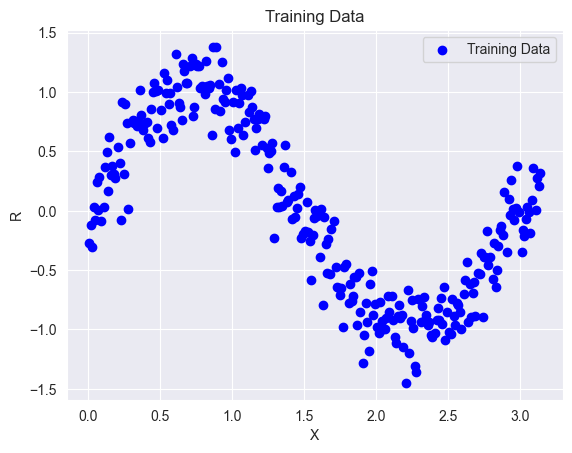

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data  = pd.read_csv('trainRegression.csv')

#plotting data to see patterns
plt.scatter(data['X'], data['R'], color='blue', label='Training Data')
plt.xlabel('X')
plt.ylabel('R')
plt.legend()
plt.title('Training Data')
plt.show()

### Training Data

Degree 1 - Training MSE: 0.2991
Degree 2 - Training MSE: 0.2883
Degree 3 - Training MSE: 0.0497
Degree 4 - Training MSE: 0.0444
Degree 5 - Training MSE: 0.0385
Degree 6 - Training MSE: 0.0385


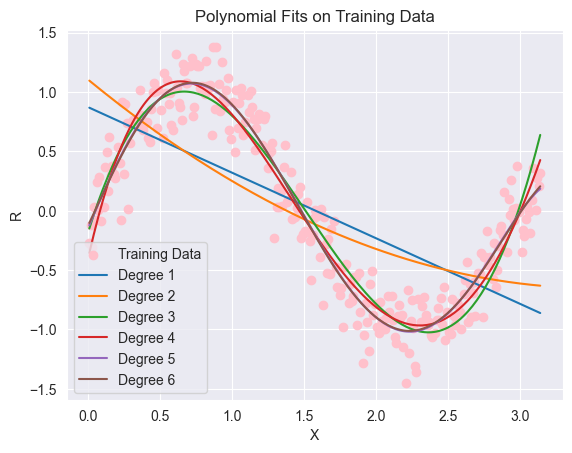

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read training data
train_data = pd.read_csv('trainRegression.csv')
X_train = train_data['X'].values
R_train = train_data['R'].values

# For storing results
models = {}

# Fit polynomial regression for degrees 1 to 6
for degree in range(1, 7):
    coeffs = np.polyfit(X_train, R_train, degree)
    model = np.poly1d(coeffs)
    models[degree] = model

    # Predict on training data
    R_pred = model(X_train)

    # Calculate MSE
    mse = np.mean((R_pred - R_train)**2)
    print(f"Degree {degree} - Training MSE: {mse:.4f}")

# Plot training data
plt.scatter(X_train, R_train, color='pink', label='Training Data')

# Plot fitted curves for each degree
x_line = np.linspace(min(X_train), max(X_train), 200)
for degree, model in models.items():
    plt.plot(x_line, model(x_line), label=f'Degree {degree}')

plt.xlabel('X')
plt.ylabel('R')
plt.title('Polynomial Fits on Training Data')
plt.legend()

### Testing Data

Degree 1 - Test MSE: 0.3159
Degree 2 - Test MSE: 0.3260
Degree 3 - Test MSE: 0.0515
Degree 4 - Test MSE: 0.0500
Degree 5 - Test MSE: 0.0442
Degree 6 - Test MSE: 0.0445


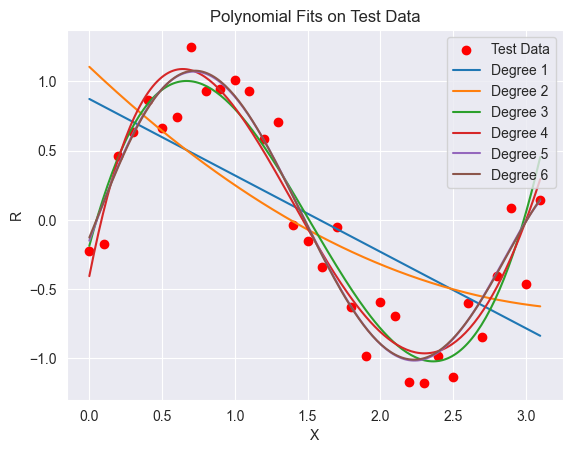

In [22]:
test_data = pd.read_csv('testRegression.csv')
X_test = test_data['X'].values
R_test = test_data['R'].values


for degree in range(1,7):
    R_pred_test = models[degree](X_test)
    mse_test = np.mean((R_test - R_pred_test)**2)
    print(f"Degree {degree} - Test MSE: {mse_test:.4f}")



# Plot testing data and curves
plt.scatter(X_test, R_test, color='red', label='Test Data')
x_line = np.linspace(min(X_test), max(X_test), 200)
for degree, poly_model in models.items():
    plt.plot(x_line, poly_model(x_line), label=f'Degree {degree}')
plt.xlabel('X')
plt.ylabel('R')
plt.title('Polynomial Fits on Test Data')
plt.legend()
plt.show()

In [23]:
# Degree 1 & 2: Cannot capture the sinusoidal pattern; high MSE (underfitting).
# Degree 3 & 4: Fit the pattern well; low MSE and good generalization.
# Degree 5 & 6: Fit almost perfectly; Degree 5 has the lowest MSE but may overfit with larger/noisy datasets.
